<h1> Import Library </h1>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

<h1>Load Dataset</h1>

In [5]:
col_names = ['department', 'status', 'usia', 'gaji', 'jumlah']
dataKaryawan = pd.read_csv("dataKaryawan.csv", header=None, names = col_names)
dataKaryawan

,department,status,usia,gaji,jumlah
0,sales,senior,31-35,46K-50K,30
1,sales,junior,26-30,26K-30K,40
2,sales,junior,31-35,31K-35K,40
3,systems,junior,21-25,46K-50K,20
4,systems,senior,31-35,66K-70K,5
5,systems,junior,26-30,46K-50K,3
6,systems,senior,41-45,66K-70K,3
7,marketing,senior,36-40,46K-50K,10
8,marketing,junior,31-35,41K-45K,4
9,secretary,senior,46-50,36K-40K,4


<h1>Data Transformation</h1>

In [7]:

dataKaryawan['department'].replace({'secretary':1, 'marketing':2, 'systems':3, 'sales':4}, inplace=True)
dataKaryawan['status'].replace({'senior':1, 'junior':2}, inplace=True)
dataKaryawan['usia'].replace({'46-50':1, '41-45':2, '36-40':3, '31-35':4, '26-30':5, '21-25':6}, inplace=True)
dataKaryawan['gaji'].replace({'66K-70K':1, '46K-50K':2, '41K-45K':3, '36K-40K':4, '31K-35K':5, '26K-30K':6}, inplace=True)
dataKaryawan

,department,status,usia,gaji,jumlah
0,4,1,4,2,30
1,4,2,5,6,40
2,4,2,4,5,40
3,3,2,6,2,20
4,3,1,4,1,5
5,3,2,5,2,3
6,3,1,2,1,3
7,2,1,3,2,10
8,2,2,4,3,4
9,1,1,1,4,4


<h1>Feature Selection</h1>

In [10]:
feature_cols = ['department', 'usia', 'gaji', 'jumlah']
X = dataKaryawan[feature_cols] # Features
y = dataKaryawan.status # Target variable

<h1>Split Set</h1>

In [11]:
# Pisahkan dataset ke training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training dan 30% test

<h1>Model</h1>

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

<h1>Metrics Accuracy</h1>

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


<h1>Visualization</h1>

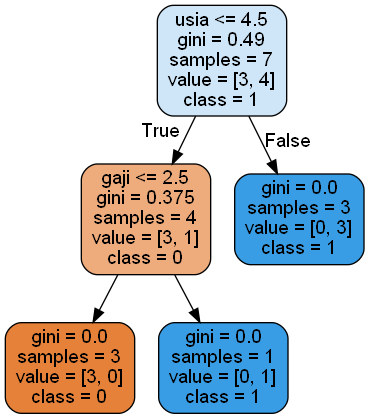

In [15]:
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_file = export_graphviz(clf, out_file=None,
                           feature_names = ['department', 'usia', 'gaji', 'jumlah'], 
                           class_names = ['0','1'],
                           rounded= True,filled =True)

graph = pydotplus.graph_from_dot_data(dot_file) 
Image(graph.create_png())